<a href="https://colab.research.google.com/github/ranjithganeshkumar/Diabetes-prediction-using-SVM/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the packages

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import svm

Data set loading and analysis

In [6]:
df=pd.read_csv('/content/diabetes.csv')
#df.head()
#df.describe()
#here we found zeros in five different coloums lets replace them with medain or mean
zero_col=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for i in zero_col:
  df[i]=df[i].replace(0,df[i].median())
df.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


i saw a big difference in 75% and max in insulin column so i will check for outlainer using boxplot

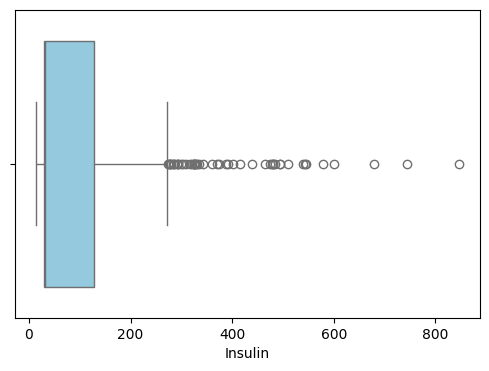

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Insulin'], color='skyblue')
plt.show()


In [8]:
#removal of outliners
for col in zero_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

In [9]:
df.describe()
#outliner are removed you can see we can not find a large differece in max and Q3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.358073,27.116536,86.139811,32.389063,0.471876,33.240885,0.348958
std,3.369578,30.438286,11.697097,8.447423,76.287377,6.667627,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,9.500000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,45.500000,272.375000,50.250000,2.420000,81.000000,1.000000


split the data and scale it as it has different ranges

In [10]:
x=df.drop(columns='Outcome',axis=1)
y=df['Outcome']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Model training

In [11]:
model = svm.SVC(kernel='rbf', random_state=42)
model.fit(x_train, y_train)


SVC(random_state=42)

prediction and classification report

In [12]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7337662337662337

Confusion Matrix:
 [[84 16]
 [25 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       100
           1       0.64      0.54      0.59        54

    accuracy                           0.73       154
   macro avg       0.71      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154



In [17]:
test_point = [[4, 125, 78, 28, 85, 33.6, 0.52, 36]]
test_point_scaled = scaler.transform(test_point)
prediction = model.predict(test_point_scaled)
print('diabeties' if prediction[0]!=0 else 'No diabeties')

No diabeties


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
